In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing

In [243]:
df = pd.read_csv('marketing_data.csv')

In [244]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


### Q1: Once data is imported, investigate variables like Dt_Customer and Income, etc., and check if they are imported correctly.


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [51]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [245]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [54]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [246]:
df.columns = df.columns.str.replace(' ', '')

In [36]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [56]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [247]:
def reg(x):
    return float(x.replace('$', '').replace(',', ''))
df['Income'] = df['Income'].astype(str).apply(reg)

In [248]:
df.columns = [i.strip() for i in df.columns]

In [249]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [82]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [83]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    


#### Q2 : Income values for a few customers are missing. Perform missing value imputation. Assume that the customers with similar education and marital status make the same yearly Income, on average. You may have to clean the data before performing this. For data cleaning, look into the categories of education and marital status. 


In [250]:
df[df['Income'].isna() == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,5,65,26,20,14,2,4,2,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,42,48,94,66,96,7,4,10,4,3,0,0,0,0,0,0,0,AUS


<Axes: >

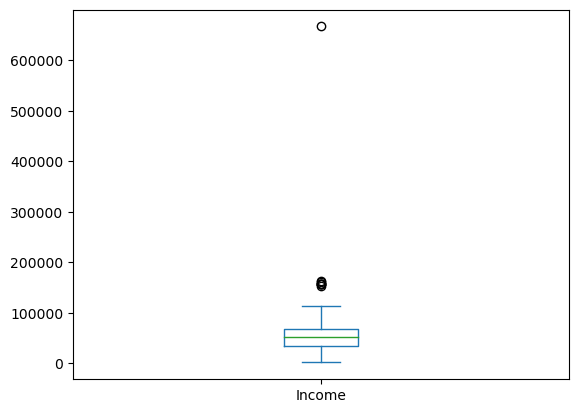

In [251]:
df["Income"].plot(kind = 'box')

In [252]:
q1, q3 = df['Income'].quantile([0.25, 0.75]).values
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
df[(df['Income'] > upper_bound) | (df['Income'] < lower_bound)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
325,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,SA
497,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,US
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,SA
731,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,SP
853,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,SP
1826,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,SP
1925,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,CA
2204,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,IND


In [253]:
df.drop(df[(df['Income'] > upper_bound) | (df['Income'] < lower_bound)].index, inplace = True)

In [92]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [254]:
df.groupby(['Education', 'Marital_Status']).sum()

/var/folders/bx/3v6gtz555rbcxsjzxg0cp8pw0000gn/T/ipykernel_40937/1820764660.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Education', 'Marital_Status']).sum()


ID  Year_Birth      Income  Kidhome  Teenhome  \
Education  Marital_Status                                                       
2n Cycle   Divorced         124748       45183   1136088.0        9        11   
           Married          458982      159825   3696088.0       40        31   
           Single           225545       73025   1932262.0       18        15   
           Together         303688      112491   2505239.0       29        23   
           Widow             21444        9797    256961.0        1         3   
Basic      Divorced           5342        1976      9548.0        1         0   
           Married           75883       39565    439210.0       10         1   
           Single           116986       35692    328296.0       15         3   
           Together          92241       27590    297361.0        8         1   
           Widow               954        1960     22123.0        0         0   
Graduation Absurd             7734        1993     79244.0        0         0   
           Alone                92        1988     34176.0        1         0   
           Divorced         649586      232104   6334675.0       48        69   
           Married         2449896      853156  21793311.0      198       217   
           Single          1366355      496929  12625257.0      110       100   
           Together        1648582      558994  15067355.0      132       150   
           Widow            228231       68686   1924183.0       11        21   
Master     Absurd             4369        1957     65487.0        0         0   
           Alone               433        1958     61331.0        1         1   
           Divorced         176030       72790   1862282.0       17        19   
           Married          745719      271471   7353472.0       66        81   
           Single           413000      147804   4014792.0       39        28   
           Together         582255      206360   5157386.0       42        61   
           Widow             72208       23434    642417.0        2         8   
PhD        Alone              7660        1973     35860.0        1         1   
           Divorced         297817      102148   2761024.0       21        38   
           Married         1115407      371796  10571256.0       80       111   
           Single           512950      192865   5118203.0       41        49   
           Together         625943      227957   6338408.0       47        71   
           Widow            136819       46932   1446914.0        4        17   
           YOLO              11625        3946     96864.0        0         2   

                           Recency  MntWines  MntFruits  MntMeatProducts  \
Education  Marital_Status                                                  
2n Cycle   Divorced           1041      8077        588             3466   
           Married            3924     12537       2225             9935   
           Single             1631      7768       1152             6564   
           Together           2933     10740       1635             7789   
           Widow               300      1109        278              921   
Basic      Divorced             31         0          1                3   
           Married             912       304        309              340   
           Single              903        56        165              137   
           Together            693        28        122              114   
           Widow                77         3          3               24   
Graduation Absurd               58       471        102              125   
           Alone                12         5          7               24   
           Divorced           6168     35768       3928            19394   
           Married           21196    118022      12745            74136   
           Single            12802     66342       8244            47530   
           Together          14218     89299       8548           

In [106]:
pd.pivot_table(df,index = 'Marital_Status', columns = 'Education', values = 'Income', aggfunc = 'mean', dropna = True)

Education,2n Cycle,Basic,Graduation,Master,PhD
Marital_Status,,,,,
Absurd,NaN,NaN,79244.000000,65487.000000,NaN
Alone,NaN,NaN,34176.000000,61331.000000,35860.000000
Divorced,49395.130435,9548.000000,53683.686441,50331.945946,53096.615385
Married,46201.100000,21960.500000,50800.258741,53286.028986,56530.780749
Single,53673.944444,18238.666667,51322.182927,53530.560000,53314.614583
Together,44736.410714,21240.071429,53241.537102,51063.227723,55116.591304
Widow,51392.200000,22123.000000,54976.657143,58401.545455,60288.083333
YOLO,NaN,NaN,NaN,NaN,48432.000000


In [255]:
df['Income_mean'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform('mean')

In [256]:
df.loc[df['Income'].isna() == True, 'Income'] = df['Income_mean']

In [257]:
df.iloc[[262]]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_mean
262,1994,1983,Graduation,Married,50800.258741,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US,50800.258741


In [258]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Income_mean            0
dtype: int64


#### Q3: Create variables to populate the total number of children, age, and total spending. 


In [151]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_mean
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,53683.686441
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,51322.182927
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,50800.258741
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,53241.537102
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,51322.182927


In [259]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [153]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_mean,Total_Children
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,1,0,SP,53683.686441,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,1,0,CA,51322.182927,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,US,50800.258741,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,0,AUS,53241.537102,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,1,0,SP,51322.182927,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,0,US,53096.615385,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,0,SP,46201.100000,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,0,SP,53683.686441,1
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,0,IND,50800.258741,0


In [260]:
df['age'] = datetime.datetime.now().year - df['Year_Birth']

In [159]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_mean,Total_Children,age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,53683.686441,0,53
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,51322.182927,0,62
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,50800.258741,1,65
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,53241.537102,2,56
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,51322.182927,1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,US,53096.615385,1,47
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,SP,46201.100000,1,46
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,SP,53683.686441,1,47
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,IND,50800.258741,0,45


In [261]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Income_mean',
       'Total_Children', 'age'],
      dtype='object')

In [262]:
dic = pd.read_excel('datadictionaryresponsetomarketingcampaigns.xlsx')

In [263]:
pd.set_option("display.max_colwidth", 300)
pd.set_option("display.max_columns", 300)

In [264]:
dic

,Variable,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,number of small children in customer's household number of teenagers in customer's household
6,Teenhome,no of teenagers in customer's house
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,number of days since the last purchase
9,MntWines,amount spent on wine in last 2 years


In [265]:
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis = 1)

In [266]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_mean,Total_Children,age,Total_Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53683.686441,0,53,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,51322.182927,0,62,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,50800.258741,1,65,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,53241.537102,2,56,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,51322.182927,1,34,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,53096.615385,1,47,689
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,46201.100000,1,46,55
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,53683.686441,1,47,309
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,50800.258741,0,45,1383



#### Q4: Create box plots and histograms to understand the distributions and outliers. Perform outlier treatment.


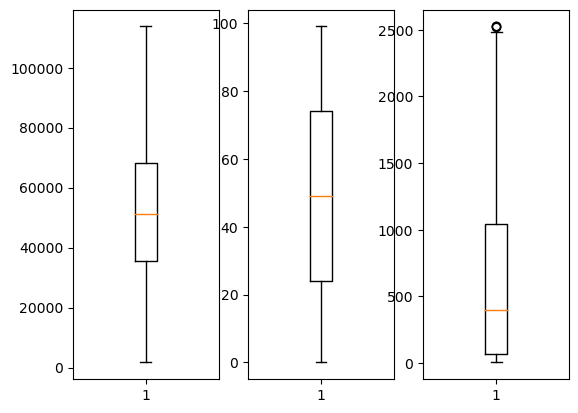

In [267]:
plt.subplot(1, 3, 1)
plt.boxplot(df['Income'])
# df.plot()
plt.subplot(1, 3, 2)
plt.boxplot(df['Recency'])

plt.subplot(1, 3, 3)
plt.boxplot(df['Total_Spending'])

plt.show()

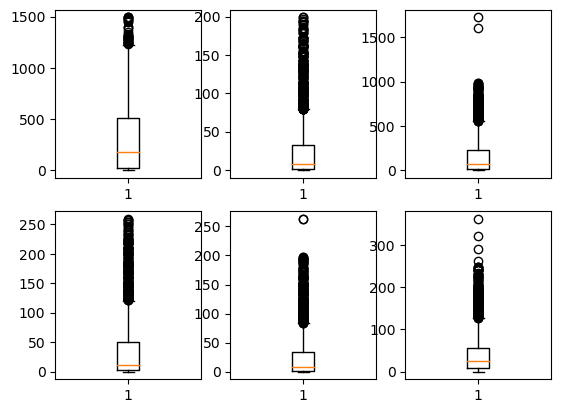

In [268]:
plt.subplot(2, 3, 1)
plt.boxplot(df['MntWines'])

plt.subplot(2, 3, 2)
plt.boxplot(df['MntFruits'])

plt.subplot(2, 3, 3)
plt.boxplot(df['MntMeatProducts'])

plt.subplot(2, 3, 4)
plt.boxplot(df['MntFishProducts'])

plt.subplot(2, 3, 5)
plt.boxplot(df['MntSweetProducts'])

plt.subplot(2, 3, 6)
plt.boxplot(df['MntGoldProds'])

plt.show()

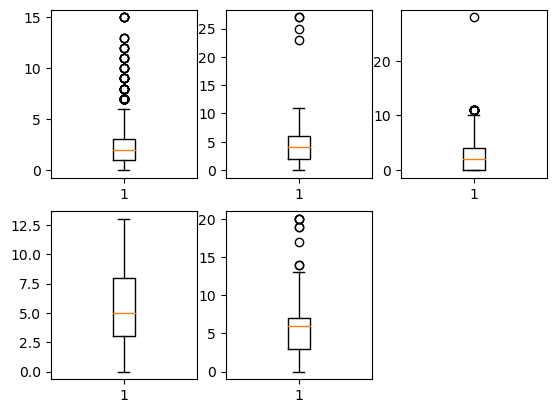

In [269]:
plt.subplot(2, 3, 1)
plt.boxplot(df['NumDealsPurchases'])

plt.subplot(2, 3, 2)
plt.boxplot(df['NumWebPurchases'])

plt.subplot(2, 3, 3)
plt.boxplot(df['NumCatalogPurchases'])

plt.subplot(2, 3, 4)
plt.boxplot(df['NumStorePurchases'])

plt.subplot(2, 3, 5)
plt.boxplot(df['NumWebVisitsMonth'])


plt.show()

In [270]:
q1, q3 = df['MntGoldProds'].quantile([0.25, 0.75]).values
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

df[(df['MntGoldProds'] > upper) | (df['MntGoldProds'] < lower)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_mean,Total_Children,age,Total_Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53683.686441,0,53,1190
14,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,0,SP,50800.258741,1,54,359
31,9264,1986,Graduation,Married,79529.0,0,0,2014-04-27,1,423,42,706,73,197,197,1,4,8,9,2,0,0,0,0,0,0,0,CA,50800.258741,0,37,1638
39,3767,1968,Graduation,Married,61314.0,0,1,2013-04-25,1,378,0,189,97,172,172,2,5,5,12,3,0,0,0,0,0,0,0,SP,50800.258741,1,55,1008
60,4246,1982,Master,Single,6560.0,0,0,2013-12-12,2,67,11,26,4,3,262,0,1,0,1,17,0,0,0,0,0,0,0,SP,53530.560000,0,41,373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,3336,1948,PhD,Together,66375.0,0,1,2013-11-21,96,712,0,45,0,0,191,3,2,4,5,7,1,0,0,0,0,0,0,AUS,55116.591304,1,75,948
2175,5748,1965,Graduation,Married,59754.0,0,1,2012-12-01,96,115,27,44,4,146,139,3,5,2,6,5,0,0,0,0,0,1,0,SA,50800.258741,1,58,475
2219,5687,1980,Graduation,Divorced,81702.0,0,0,2012-09-23,98,563,50,774,28,31,187,1,7,7,12,3,0,0,0,0,0,0,0,CA,53683.686441,0,43,1633
2223,2831,1976,Graduation,Together,78416.0,0,1,2014-06-27,99,453,38,279,188,38,183,2,7,7,10,3,0,0,0,0,0,0,0,SP,53241.537102,1,47,1179



#### Q5: Use ordinal encoding and one hot encoding according to different types of categorical variables.


In [271]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Income_mean',
       'Total_Children', 'age', 'Total_Spending'],
      dtype='object')

In [198]:
dic

,Variable,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,number of small children in customer's household number of teenagers in customer's household
6,Teenhome,no of teenagers in customer's house
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,number of days since the last purchase
9,MntWines,amount spent on wine in last 2 years


In [272]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [273]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [274]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'. 
df['Education_Encode']= label_encoder.fit_transform(df['Education']) 
  
df['Education_Encode'].unique() 
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_mean,Total_Children,age,Total_Spending,Education_Encode
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53683.686441,0,53,1190,2
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,51322.182927,0,62,577,2
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,50800.258741,1,65,251,2
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,53241.537102,2,56,11,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,51322.182927,1,34,91,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,53096.615385,1,47,689,4
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,46201.100000,1,46,55,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,53683.686441,1,47,309,2
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,50800.258741,0,45,1383,2


In [275]:
df = pd.get_dummies(df, columns = ['Marital_Status', 'Country']) 
df

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income_mean,Total_Children,age,Total_Spending,Education_Encode,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,Graduation,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,53683.686441,0,53,1190,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1961,Graduation,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,51322.182927,0,62,577,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,10476,1958,Graduation,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,50800.258741,1,65,251,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1386,1967,Graduation,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,53241.537102,2,56,11,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,5371,1989,Graduation,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,51322.182927,1,34,91,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,66476.0,0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,53096.615385,1,47,689,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2236,5263,1977,2n Cycle,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,46201.100000,1,46,55,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2237,22,1976,Graduation,46310.0,1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,53683.686441,1,47,309,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2238,528,1978,Graduation,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,50800.258741,0,45,1383,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0



#### Q6: Create a heatmap to showcase the correlation between different pairs of variables.
    

In [277]:
cor = df.corr()

/var/folders/bx/3v6gtz555rbcxsjzxg0cp8pw0000gn/T/ipykernel_40937/2226764872.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<Axes: >

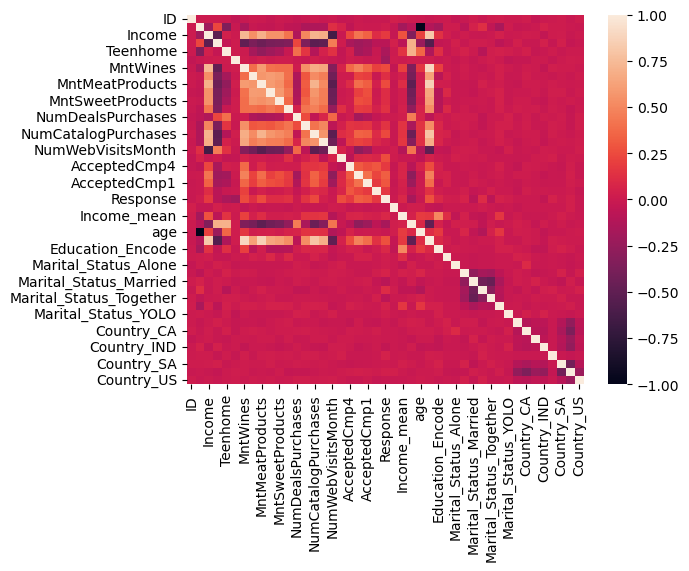

In [278]:
import seaborn as sns
sns.heatmap(cor)

In [279]:
cor1 = abs(cor)
cor1[cor1 > 0.5].fillna('')

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income_mean,Total_Children,age,Total_Spending,Education_Encode,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
ID,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Year_Birth,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,1.0,,,,,,,,,,,,,,,,,,
Income,,,1.0,0.527466,,,0.728192,0.536171,0.693009,0.550535,0.55015,,,,0.706818,0.682673,0.644508,,,,,,,,,,,0.819819,,,,,,,,,,,,,,,,,
Kidhome,,,0.527466,1.0,,,,,,,,,,,0.51708,0.504096,,,,,,,,,,0.689731,,0.556761,,,,,,,,,,,,,,,,,
Teenhome,,,,,1.0,,,,,,,,,,,,,,,,,,,,,0.698163,,,,,,,,,,,,,,,,,,,
Recency,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MntWines,,,0.728192,,,,1.0,,0.586803,,,,,0.540877,0.673806,0.641156,,,,,,,,,,,,0.896013,,,,,,,,,,,,,,,,,
MntFruits,,,0.536171,,,,,1.0,0.563786,0.594308,0.566655,,,,0.515792,,,,,,,,,,,,,0.616548,,,,,,,,,,,,,,,,,
MntMeatProducts,,,0.693009,,,,0.586803,0.563786,1.0,0.590312,0.54475,,,,0.704037,0.509449,0.543495,,,,,,,,,0.511334,,0.853739,,,,,,,,,,,,,,,,,
MntFishProducts,,,0.550535,,,,,0.594308,0.590312,1.0,0.579301,,,,0.565151,,,,,,,,,,,,,0.645305,,,,,,,,,,,,,,,,,



#### Q7: Test the following hypotheses:
    1. Older people are not as tech-savvy and probably prefer shopping in-store.
    2. Customers with kids probably have less time to visit a store and would prefer to shop online.
    3. Other distribution channels may cannibalize sales at the store.
    4. Does the US fare significantly better than the rest of the world in terms of total purchases?
    

In [280]:
df['age'].unique()

array([ 53,  62,  65,  56,  34,  69,  76,  44,  64,  42,  54,  46,  63,
        57,  47,  58,  67,  48,  52,  37,  51,  49,  33,  36,  39,  55,
        68,  40,  50,  45,  71,  61,  59,  41,  60,  66,  43,  78,  74,
        75,  70,  77,  38,  31,  79,  72,  35,  73,  29,  30,  32, 130,
        27,  28, 124,  80,  82,  83, 123])

In [301]:
df['age_bin'] = pd.cut(df['age'], [0, 60, 200], labels = ['adults', 'seniors'])

In [302]:
df

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income_mean,Total_Children,age,Total_Spending,Education_Encode,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,age_bin
0,1826,1970,Graduation,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,53683.686441,0,53,1190,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,adults
1,1,1961,Graduation,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,51322.182927,0,62,577,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,seniors
2,10476,1958,Graduation,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,50800.258741,1,65,251,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,seniors
3,1386,1967,Graduation,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,53241.537102,2,56,11,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,adults
4,5371,1989,Graduation,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,51322.182927,1,34,91,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,66476.0,0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,53096.615385,1,47,689,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,adults
2236,5263,1977,2n Cycle,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,46201.100000,1,46,55,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,adults
2237,22,1976,Graduation,46310.0,1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,53683.686441,1,47,309,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,adults
2238,528,1978,Graduation,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,50800.258741,0,45,1383,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,adults


In [303]:
df['age_bin'].value_counts()

adults     1534
seniors     698
Name: age_bin, dtype: int64

In [304]:
df.groupby('age_bin').sum()[['NumWebPurchases', 'NumStorePurchases']]

/var/folders/bx/3v6gtz555rbcxsjzxg0cp8pw0000gn/T/ipykernel_40937/454491075.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('age_bin').sum()[['NumWebPurchases', 'NumStorePurchases']]


,NumWebPurchases,NumStorePurchases
age_bin,,
adults,5978,8452
seniors,3168,4512


In [306]:
from scipy import stats

adults_web_purchase = df[df['age_bin'] == 'adults']['NumWebPurchases']
seniors_web_purchase = df[df['age_bin'] == 'seniors']['NumWebPurchases']

stat, pVal = stats.ttest_ind(adults_web_purchase, seniors_web_purchase)

In [307]:
pVal

3.8124223108451847e-07

In [313]:
web_purchase_without_kids = df[df['Kidhome'] == 0]['NumWebPurchases']
web_purchase_with_kids = df[df['Kidhome'] > 0]['NumWebPurchases']

stat, pVal = stats.ttest_ind(web_purchase_without_kids, web_purchase_with_kids)
pVal

2.6118516485943036e-76

In [334]:
web_purchase_without_kids.sum()

6431

In [333]:
web_purchase_with_kids.sum()

2715

In [315]:
round(pVal, 5)

0.0

In [316]:
df['day'] = df['Dt_Customer'].dt.day_of_week

In [317]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Income_mean', 'Total_Children', 'age',
       'Total_Spending', 'Education_Encode', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Country_AUS', 'Country_CA', 'Country_GER',
       'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US',
       'age_bin', 'day'],
      dtype='object')

In [322]:
df.groupby('day').sum()[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

/var/folders/bx/3v6gtz555rbcxsjzxg0cp8pw0000gn/T/ipykernel_40937/3348200411.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('day').sum()[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]


,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
day,,,
0,1397,883,1906
1,1172,741,1705
2,1444,922,1945
3,1164,707,1694
4,1423,994,2069
5,1351,859,1876
6,1195,778,1769


In [323]:
import numpy as np
from scipy.stats import chi2_contingency

table = df.groupby('day').sum()[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
res = chi2_contingency(table)

/var/folders/bx/3v6gtz555rbcxsjzxg0cp8pw0000gn/T/ipykernel_40937/437333834.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  table = df.groupby('day').sum()[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]


In [325]:
res.pvalue

0.2915471199817298

In [326]:
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [327]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Income_mean', 'Total_Children', 'age',
       'Total_Spending', 'Education_Encode', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Country_AUS', 'Country_CA', 'Country_GER',
       'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US',
       'age_bin', 'day', 'Total_Purchases'],
      dtype='object')

In [328]:
total_purchases_US = df[df['Country_US'] == 1][['Total_Purchases']]
total_purchases_other = df[df['Country_US'] == 0][['Total_Purchases']]

stat, pVal = stats.ttest_ind(total_purchases_US, total_purchases_other)
pVal

array([0.21928626])

In [335]:
total_purchases_US.sum()

Total_Purchases    1444
dtype: int64

In [336]:
total_purchases_other.sum()

Total_Purchases    26550
dtype: int64


####   Q8: Use appropriate visualization to help analyze the following:

    1. Which products are performing the best, and which are performing the least in terms of revenue?
    2. Is there any pattern between the age of customers and the last campaign acceptance rate?
    3. Which Country has the greatest number of customers who accepted the last campaign?
    4. Do you see any pattern in the no. of children at home and total spend?
    5. Education background of the customers who complained in the last 2 years.
    

In [338]:
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values()

MntFruits            58881
MntSweetProducts     60611
MntFishProducts      84023
MntGoldProds         98579
MntMeatProducts     368993
MntWines            680604
dtype: int64

In [342]:
df.groupby(['age_bin']).sum()['Response']

/var/folders/bx/3v6gtz555rbcxsjzxg0cp8pw0000gn/T/ipykernel_40937/3550152174.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['age_bin']).sum()['Response']


age_bin
adults     232
seniors    102
Name: Response, dtype: int64

In [343]:
df.groupby(['Response']).sum()[['Country_AUS', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US']]

/var/folders/bx/3v6gtz555rbcxsjzxg0cp8pw0000gn/T/ipykernel_40937/357876010.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Response']).sum()[['Country_AUS', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US']]


,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
Response,,,,,,,,
0,137,229,103,134,1,283,916,95
1,23,38,17,13,2,52,176,13


In [344]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Income_mean', 'Total_Children', 'age',
       'Total_Spending', 'Education_Encode', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Country_AUS', 'Country_CA', 'Country_GER',
       'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US',
       'age_bin', 'day', 'Total_Purchases'],
      dtype='object')

In [345]:
df['Total_Spending']

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: Total_Spending, Length: 2232, dtype: int64

In [347]:
df[['Total_Spending', 'Total_Children']].groupby('Total_Children').mean()

,Total_Spending
Total_Children,
0,1107.548896
1,472.456889
2,246.278571
3,274.603774


In [348]:
df[['Total_Spending', 'Total_Children']].corr()

,Total_Spending,Total_Children
Total_Spending,1.000000,-0.499886
Total_Children,-0.499886,1.000000


In [350]:
df[['Education', 'Complain', 'ID']].pivot_table(index = 'Complain', columns = 'Education', values = 'ID', aggfunc = 'count')

Education,2n Cycle,Basic,Graduation,Master,PhD
Complain,,,,,
0,199.0,54.0,1110.0,367.0,481.0
1,4.0,NaN,14.0,2.0,1.0
